# Empirical Distribution Predictors

We may be losing a lot of information in the annotations by condensing them into a single number. Instead, we can train a model to predict the empirical distribution formed by the annotations over the answer choices. We do this by minimizing the cross-entropy between the predicted distributions and the empirical distributions. This is essentially softmax classification, but off-the-shelf implementations don't let you pass a distribution as a training label, so we have to roll our own in TensorFlow.

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from ngram import *
from baselines import *
from error_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
d = tidy_labels(pd.concat(load_cf_data()))
d = d.dropna(subset=['aggression_score'])
d = d.iloc[np.random.permutation(np.arange(d.shape[0]))]

In [3]:
max_features = 5000
architecture = [50, 20]

In [4]:
ngram_feature_pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range = (1,5), analyzer = 'char', max_features = max_features)),
    ('tfidf', TfidfTransformer(sublinear_tf=True,norm='l2')),
])

In [5]:
training_epochs = 75
batch_size = 500
display_step = 500

# Agression Model

Fit a softmax regression to the empirical distribtion of annotions over answer choices.

In [6]:
labels = empirical_dist(d['aggression_score'], w = 0.25)
data = get_labeled_comments(d, labels)
train, test = train_test_split(data, test_size = 0.2, random_state=0)

y_train =train.ix[:, train.columns != 'x'].values
y_test =test.ix[:, train.columns != 'x'].values

ngram_feature_extractor = ngram_feature_pipeline.fit(train['x'])
X_train = ngram_feature_extractor.transform(train['x'])
X_test = ngram_feature_extractor.transform(test['x'])

Batch: 0001 cost= 88.909225464

	Train Micro ROC: 0.438610969024
	Test Micro ROC: 0.440207158852

	Train Micro F1: 0.0606933460594
	Test Micro F1: 0.0611535314971

	Train Macro F1: 0.0312068359442
	Test Macro F1: 0.0305848609355

	Train Pearson Correlation:  0.0652828052915
	Test Pearson Correlation:  0.0616790674993

	Train Spearman Correlation:  0.0976227633287
	Test Spearman Correlation:  0.0869897221238

	Train RMSE:  1.42912075817892
	Test RMSE:  1.4240021680705441

	Train R^2:  -1.79887299232
	Test R^2:  -1.79545237231


Batch: 0501 cost= 42.789157210

	Train Micro ROC: 0.900494837602
	Test Micro ROC: 0.901399041382

	Train Micro F1: 0.786150122716
	Test Micro F1: 0.786746659395

	Train Macro F1: 0.133767729645
	Test Macro F1: 0.135751498854

	Train Pearson Correlation:  0.0161206807723
	Test Pearson Correlation:  0.00565158639325

	Train Spearman Correlation:  0.0252852957713
	Test Spearman Correlation:  0.0252687359788

	Train RMSE:  0.6978999139841052
	Test RMSE:  0.7020145194

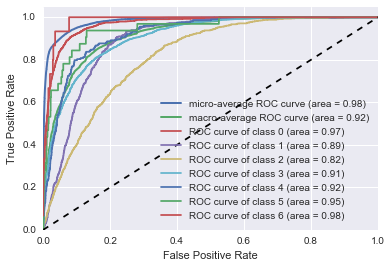

In [10]:
NN_CLF(X_train,
        y_train,
        X_test,
        y_test,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step,
        architecture = architecture)

Batch: 0001 cost= 84.433059692

	Train Micro ROC: 0.368235327749
	Test Micro ROC: 0.360029142165

	Train Micro F1: 0.0391498500136
	Test Micro F1: 0.0384510499046

	Train Macro F1: 0.0433044581743
	Test Macro F1: 0.0418069810651

	Train Pearson Correlation:  0.0779747083651
	Test Pearson Correlation:  0.0616928648896

	Train Spearman Correlation:  0.0555933387947
	Test Spearman Correlation:  0.0392959141252

	Train RMSE:  2.015621622985777
	Test RMSE:  2.0297743361649765

	Train R^2:  -1.07809974604
	Test R^2:  -1.07633932813


Batch: 0501 cost= 42.676295313

	Train Micro ROC: 0.940592681317
	Test Micro ROC: 0.938726012745

	Train Micro F1: 0.782076629397
	Test Micro F1: 0.780542677938

	Train Macro F1: 0.172432256361
	Test Macro F1: 0.168263004162

	Train Pearson Correlation:  0.231509011378
	Test Pearson Correlation:  0.226717523583

	Train Spearman Correlation:  0.162936638189
	Test Spearman Correlation:  0.165024098438

	Train RMSE:  0.7485233352895524
	Test RMSE:  0.74988829814740

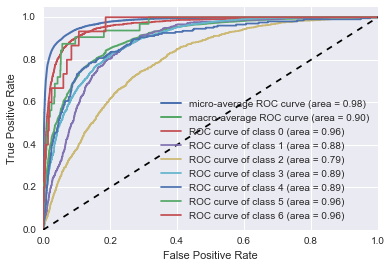

In [11]:
NN_CLF(X_train,
        y_train,
        X_test,
        y_test,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step,
        architecture = architecture,
        one_hot = True)